# Preparation

Preparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `SC_HW1_bank_data.csv` sebelum tahap pemodelan :
1. Import Library
2. Input Dataset
3. Preprocessing
4. Train-Test Split

## Import Library

In [ ]:
# Dataframe
import pandas as pd
import numpy as np

# Data Visualitation
import matplotlib.pyplot as plt
import seaborn as sns

#Missing Value
import missingno

# Handling Warning
import warnings
warnings.filterwarnings('ignore')

## Input Dataset

In [ ]:
#Membaca data dan memasukkannya ke dalam bentuk Pandas Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/SC_HW1_bank_data.csv')

In [ ]:
#Jalankan code untuk mengecek nama kolom yang tersedia
df.columns

Index(['RowNumber', 'CustomerId', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df

,RowNumber,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# EDA Process

1. Balance label data

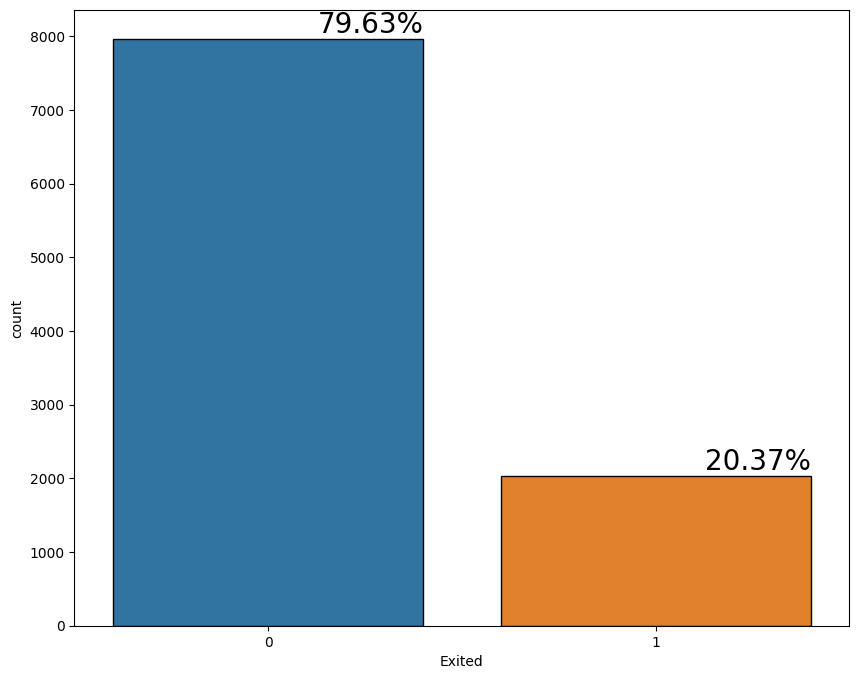

In [ ]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Exited"], edgecolor = 'black')
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.show()

2. Feature yang membuat labeling 1

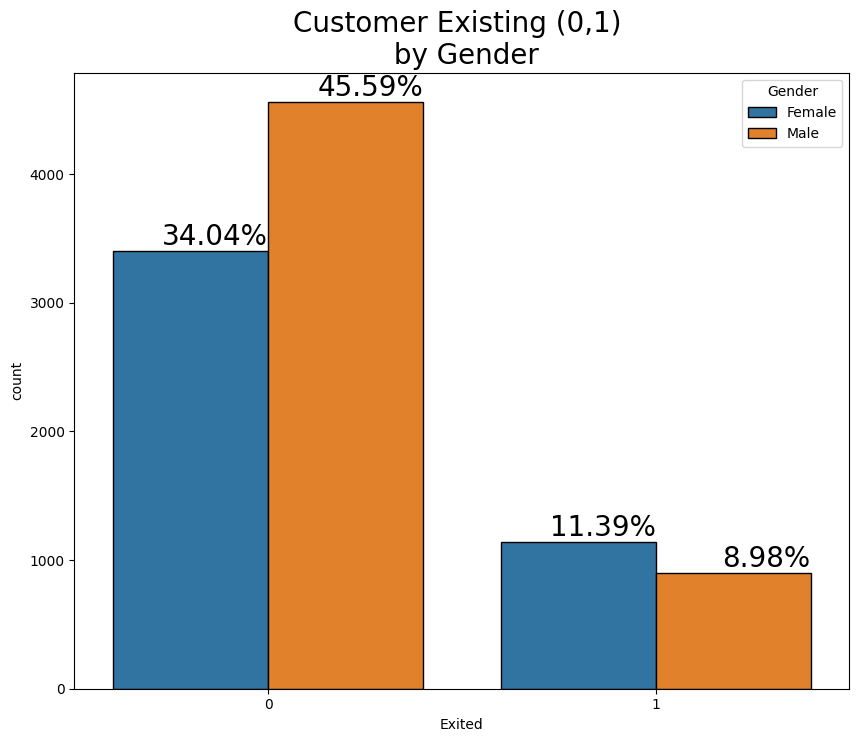

In [ ]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Exited"], hue=df["Gender"], edgecolor = 'black')
plt.title('Customer Existing (0,1) \n by Gender', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.show()

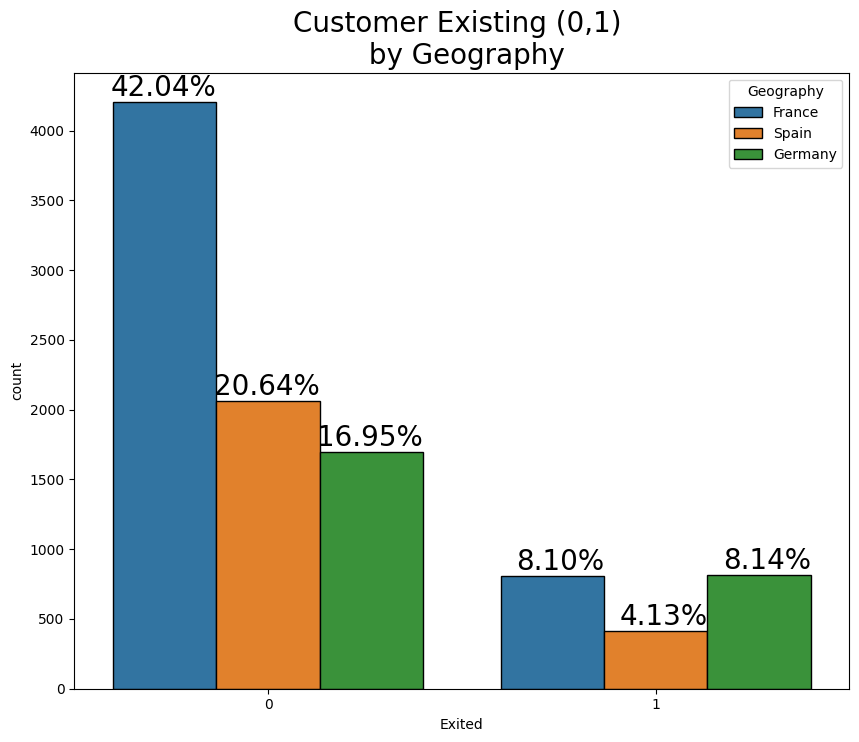

In [ ]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Exited"], hue=df["Geography"], edgecolor = 'black')
plt.title('Customer Existing (0,1) \n by Geography', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.show()

# Data Preprocessing

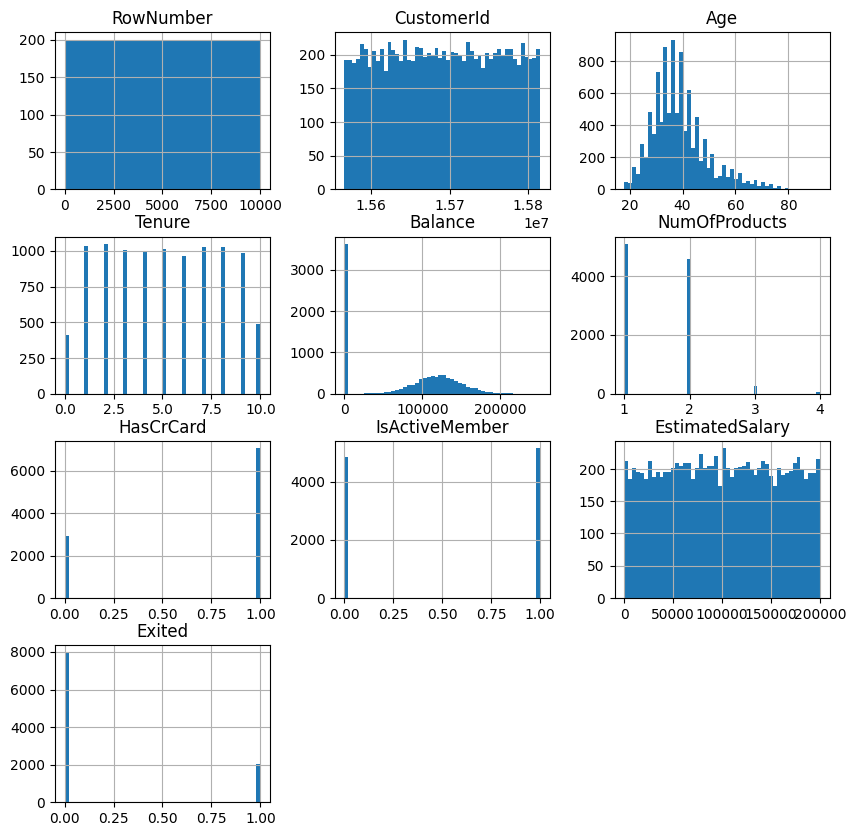

In [ ]:
# distribution data
df.hist(bins=50,figsize=(10,10))
plt.show()

In [ ]:
# check the duplicate data
pd.DataFrame({"Duplicated Data": df[df.duplicated].sum()})

,Duplicated Data
RowNumber,0.0
CustomerId,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0
HasCrCard,0.0
IsActiveMember,0.0


In [ ]:
# missing value
miss = pd.DataFrame({"Missing Value": df.isna().sum()})
miss[miss["Missing Value"]> 0]

,Missing Value


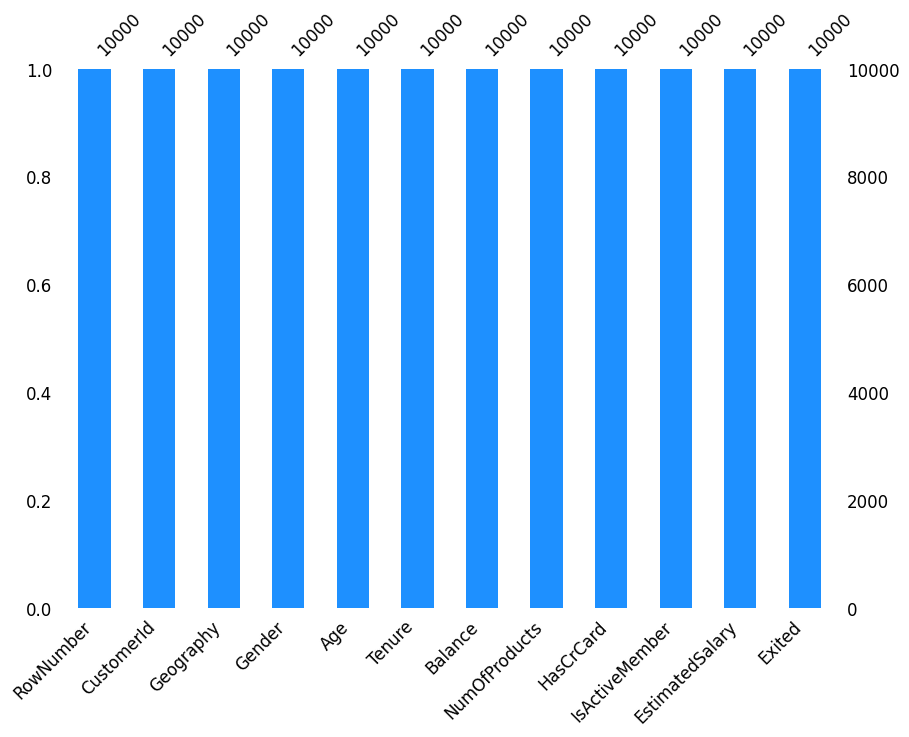

In [ ]:
# plot to visualize the missing value proportion
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,7), fontsize=12)
plt.show()

In [ ]:
# Outlier detection
def find_outlier(df, feature):
    print('Outlier ' + feature)
    q1 = df[feature].quantile(0.25)
    q2 = df[feature].quantile(0.50)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    Lower_Limit = q1 - limit
    if Lower_Limit < 0 :
        Lower_Limit = 0
    Upper_Limit = q3 + limit
    print(f'Lower_Limit: {Lower_Limit}')
    print(f'median: {q2}')
    print(f'Upper_Limit: {Upper_Limit}')
    print('_________________________')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
num_feat = df.drop(["Geography","Gender"],axis=1)
for i in num_feat:
    find_outlier(num_feat,i)

Outlier RowNumber
IQR: 4999.5
Lower_Limit: 0
median: 5000.5
Upper_Limit: 14999.5
_________________________
Outlier CustomerId
IQR: 124705.5
Lower_Limit: 15441470.0
median: 15690738.0
Upper_Limit: 15940292.0
_________________________
Outlier Age
IQR: 12.0
Lower_Limit: 14.0
median: 37.0
Upper_Limit: 62.0
_________________________
Outlier Tenure
IQR: 4.0
Lower_Limit: 0
median: 5.0
Upper_Limit: 13.0
_________________________
Outlier Balance
IQR: 127644.24
Lower_Limit: 0
median: 97198.54000000001
Upper_Limit: 319110.60000000003
_________________________
Outlier NumOfProducts
IQR: 1.0
Lower_Limit: 0
median: 1.0
Upper_Limit: 3.5
_________________________
Outlier HasCrCard
IQR: 1.0
Lower_Limit: 0
median: 1.0
Upper_Limit: 2.5
_________________________
Outlier IsActiveMember
IQR: 1.0
Lower_Limit: 0
median: 1.0
Upper_Limit: 2.5
_________________________
Outlier EstimatedSalary
IQR: 98386.1375
Lower_Limit: 0
median: 100193.915
Upper_Limit: 296967.45375
_________________________
Outlier Exited
IQR:

<AxesSubplot: >

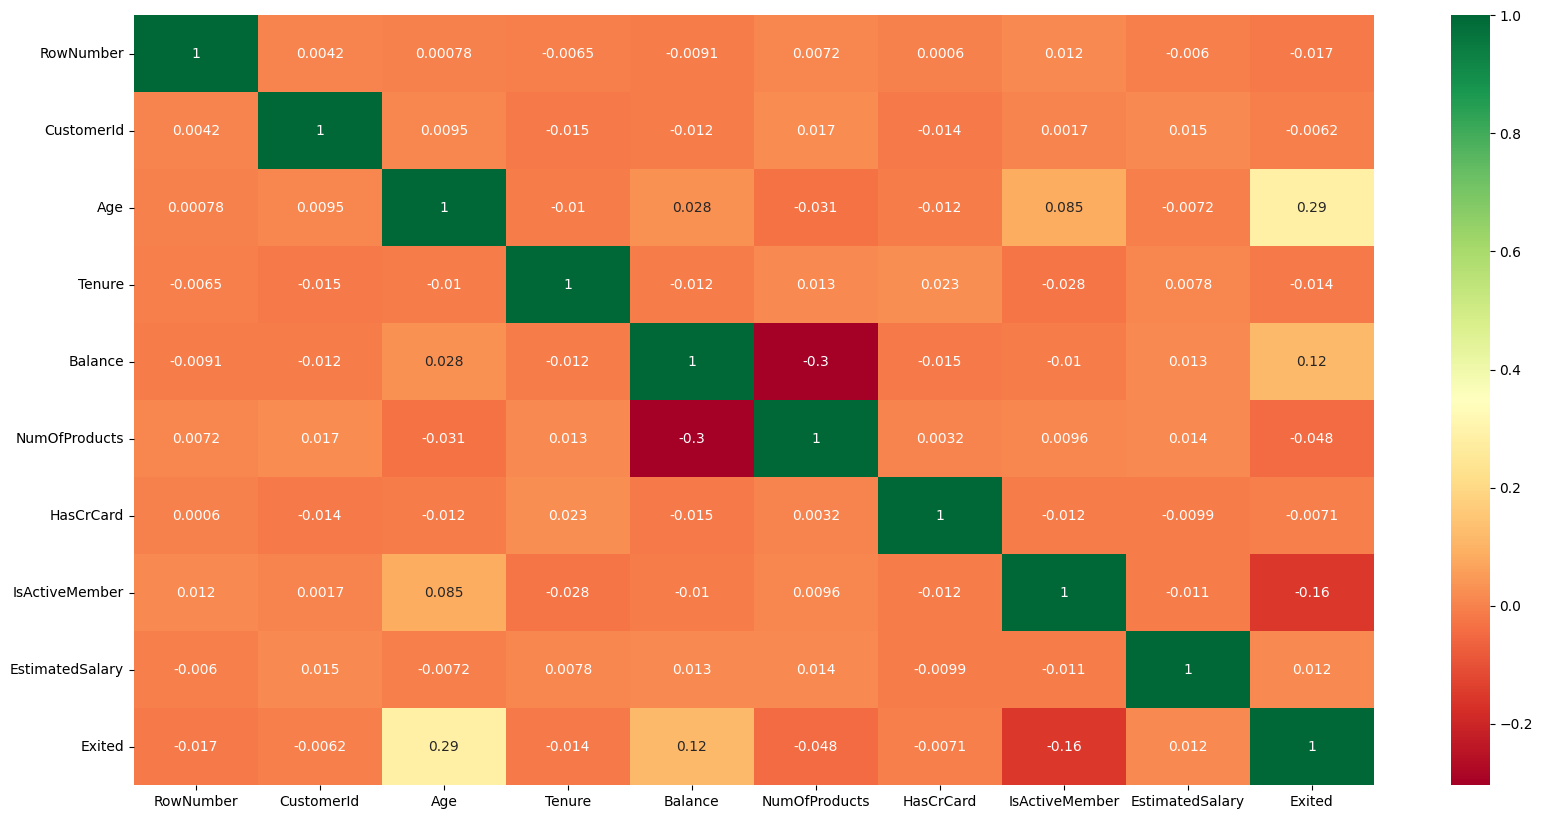

In [ ]:
corelations = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corelations,annot=True,cmap="RdYlGn")

In [ ]:
corelations["Exited"].sort_values(ascending=True)

IsActiveMember    -0.156128
NumOfProducts     -0.047820
RowNumber         -0.016571
Tenure            -0.014001
HasCrCard         -0.007138
CustomerId        -0.006248
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

In [ ]:
#Hilangkan kolom yang dirasa tidak relevan dengan model (contoh: ID). None dapat diisi dengan nama-nama kolom yang akan digunakan.
#Contoh df = df[['X1','X2', 'Y']].copy()

#START CODE
df = df.drop(["CustomerId"],axis=1)

In [ ]:
df.columns

Index(['RowNumber', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

# One hot encoder
Not use pandas get_dummies

In [ ]:
#Lakukan One-Hot Encoder untuk data categorical, dengan fungsi pandas get_dummies



#START CODE
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(handle_unknown="ignore",sparse=False)
# Pisah numerical and object columns

#Object
s=(df.dtypes=="object")
obj_cols = list(s[s].index)

#Numerical
num_cols = [cname for cname in df.columns if df[cname].dtypes in ["int64","float64"]]

#convert by one encoder
cat_encoding = pd.DataFrame(cat_encoder.fit_transform(df[obj_cols]),columns=["Male","Female","France","Germany","Spain"])
cat_encoding.index = df.index

# Convert to columns Gender

In [ ]:
cat_gender=cat_encoding.drop(["France","Germany","Spain"],axis=1)
cat_gender

,Male,Female
0,1.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
9995,1.0,0.0
9996,1.0,0.0
9997,1.0,0.0
9998,0.0,1.0


In [ ]:
cat_encoding["Gender"]= cat_gender.values.argmax(1)
cat_encoding=cat_encoding.drop(["Male","Female"],axis=1)

In [ ]:
cat_encoding

,France,Germany,Spain,Gender
0,0.0,1.0,0.0,0
1,1.0,1.0,0.0,0
2,0.0,1.0,0.0,0
3,0.0,1.0,0.0,0
4,1.0,1.0,0.0,0
...,...,...,...,...
9995,0.0,0.0,1.0,0
9996,0.0,0.0,1.0,0
9997,0.0,1.0,0.0,0
9998,0.0,0.0,1.0,1


# Convert to Columns Geography

In [ ]:
#split
cat_geography=cat_encoding.drop(["Gender"],axis=1)
cat_geography

,France,Germany,Spain
0,0.0,1.0,0.0
1,1.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,1.0,0.0
...,...,...,...
9995,0.0,0.0,1.0
9996,0.0,0.0,1.0
9997,0.0,1.0,0.0
9998,0.0,0.0,1.0


In [ ]:
cat_encoding["Geography"]= cat_geography.values.argmax(1)+1
cat_encoding=cat_encoding.drop(["France","Germany","Spain"],axis=1)
cat_encoding

,Gender,Geography
0,0,2
1,0,1
2,0,2
3,0,2
4,0,1
...,...,...
9995,0,3
9996,0,3
9997,0,2
9998,1,3


In [ ]:
df = pd.concat([df[num_cols],cat_encoding],axis=1)
df

,RowNumber,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender,Geography
0,1,42,2,0.00,1,1,1,101348.88,1,0,2
1,2,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,42,8,159660.80,3,1,0,113931.57,1,0,2
3,4,39,1,0.00,2,0,0,93826.63,0,0,2
4,5,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,39,5,0.00,2,1,0,96270.64,0,0,3
9996,9997,35,10,57369.61,1,1,1,101699.77,0,0,3
9997,9998,36,7,0.00,1,0,1,42085.58,1,0,2
9998,9999,42,3,75075.31,2,1,0,92888.52,1,1,3


In [ ]:
corelations = df.corr()
corelations["Exited"].sort_values(ascending=True)

IsActiveMember    -0.156128
NumOfProducts     -0.047820
RowNumber         -0.016571
Tenure            -0.014001
HasCrCard         -0.007138
Geography         -0.006664
EstimatedSalary    0.012097
Balance            0.118533
Gender             0.173488
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

In [ ]:
df = df.drop(["RowNumber","Geography","EstimatedSalary",],axis=1)

In [ ]:
#Pisahkan mana X (feature) dengan Y,
#Y adalah kolom "Exited"

#START CODE
X = df.drop(["Exited"],axis=1)
y = df["Exited"]
#cek
print(X.shape)
print(y.shape)

(10000, 7)
(10000,)


In [ ]:
X

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Gender
0,42,2,0.00,1,1,1,0
1,41,1,83807.86,1,0,1,0
2,42,8,159660.80,3,1,0,0
3,39,1,0.00,2,0,0,0
4,43,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,0
9996,35,10,57369.61,1,1,1,0
9997,36,7,0.00,1,0,1,0
9998,42,3,75075.31,2,1,0,1


In [ ]:
#Lakukan Scaler dan/atau Noermalisasi jika diperlukan
from sklearn.preprocessing import StandardScaler

#START CODE
scaler = StandardScaler()
X_transform = pd.DataFrame(scaler.fit_transform(X))

array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>,
        <AxesSubplot: title={'center': '2'}>],
       [<AxesSubplot: title={'center': '3'}>,
        <AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '5'}>],
       [<AxesSubplot: title={'center': '6'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

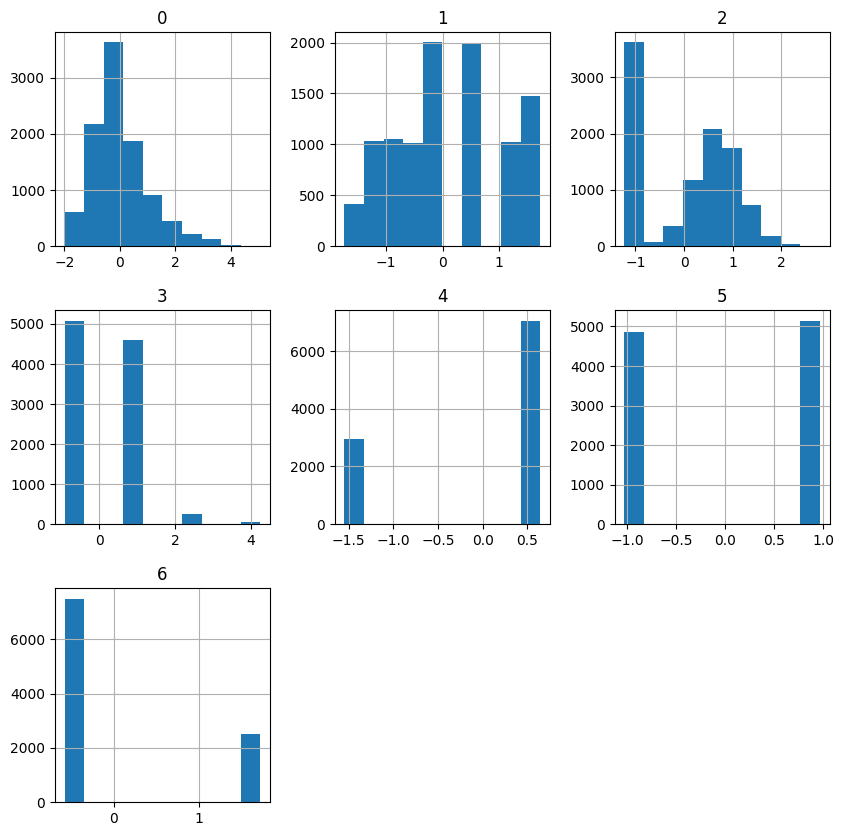

In [ ]:
X_transform.hist(figsize=(10,10))

In [ ]:
X_transform.describe()

,0,1,2,3,4,5,6
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,2.318146e-16,-1.078249e-16,-6.252776e-17,1.634248e-17,-5.258016e-17,-7.389644e-17,-7.069900e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.994969e+00,-1.733315e+00,-1.225848e+00,-9.115835e-01,-1.547768e+00,-1.030670e+00,-5.787359e-01
25%,-6.600185e-01,-6.959818e-01,-1.225848e+00,-9.115835e-01,-1.547768e+00,-1.030670e+00,-5.787359e-01
50%,-1.832505e-01,-4.425957e-03,3.319639e-01,-9.115835e-01,6.460917e-01,9.702426e-01,-5.787359e-01
75%,4.842246e-01,6.871299e-01,8.199205e-01,8.077366e-01,6.460917e-01,9.702426e-01,1.727904e+00
max,5.061197e+00,1.724464e+00,2.795323e+00,4.246377e+00,6.460917e-01,9.702426e-01,1.727904e+00


## Train-Test Split

In [ ]:
#Split menjadi train dan test dengan test_size 25%
#Tidak perlu mengubah code ini

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,test_size = 25e-2,random_state = 123)

# Modeling

## Model1

### Soal :
Jelaskan secara Singkat Model pertama yang digunakan!

SVM adalah sebuah algoritma supervised yang dapat digunakan untuk klasifikasi atau prediksi yang berlandasan dalam klasifikasi dalam SVM adalah SVC yang mana skema kerjanya memfaktorkan class kedalam dua bagian sesuai dari decision boundary yang di kontrol oleh nilai object vektor sehingga membentuk margin untuk mengklasifikasikan data (high margin ataupun low margin)

In [ ]:
from scipy.stats import reciprocal, uniform
reciprocal(1e-3,1e-2)

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
model1 = SVC(random_state=42)
params = {"gamma":reciprocal(1e-3,1e-1),"C":uniform(1,5),"kernel":["rbf","poly","sigmoid"]}
#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import RandomizedSearchCV
crossval = StratifiedKFold(n_splits=3)
grid = RandomizedSearchCV(
             estimator= model1,
             param_distributions= params,
             scoring = 'accuracy',
             n_jobs = -1, # core cpu yang digunakan
             cv = crossval # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid.fit(X_train,y_train)
grid.best_params_

{'C': 3.389698296178265, 'gamma': 0.060938624702110915, 'kernel': 'rbf'}

In [ ]:
#lakukan evaluasi dengan beberapa maetric di bawah ini
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
model1 = grid.best_estimator_
y_pred = model1.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1983
           1       0.85      0.41      0.55       517

    accuracy                           0.86      2500
   macro avg       0.86      0.70      0.74      2500
weighted avg       0.86      0.86      0.84      2500


[[1945   38]
 [ 304  213]]

0.8632


## Model2
### Soal :
Jelaskan secara Singkat Model ke-2 yang digunakan!

Decision tree adalah sebuah algoritma supervised yang dapat digunakan dalam prediksi atau klasifikasi jika ingin menggunakan sebagai klasifikasi dpt menggunakan pada sklearn adalah DecisionTreeClassifier, proses kerjanya adalah setiap parent dense data dipisahkan kedalam beberapa sample yang disesuakan dari setiap gini pada parent dense.

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.model_selection import StratifiedKFold
model2 = DecisionTreeClassifier()
params ={"max_depth": [3, 7], 
         "max_features": randint(1,10), 
         "min_samples_leaf": randint(1, 10),
         "criterion": ["gini", "entropy"]}
#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
crossval = StratifiedKFold(n_splits=3)
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(
             estimator= model2,
             param_distributions= params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = crossval # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 9,
 'min_samples_leaf': 3}

In [ ]:
from sklearn import tree
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['No Disease', "Disease"],
                       filled=True)

In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
model2 = grid.best_estimator_
y_pred = model2.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1983
           1       0.82      0.46      0.59       517

    accuracy                           0.87      2500
   macro avg       0.85      0.72      0.76      2500
weighted avg       0.86      0.87      0.85      2500


[[1932   51]
 [ 278  239]]

0.8684


## Model3
### Soal :
Jelaskan secara Singkat Model ke-3 yang digunakan!

Xtream gradient boosting adalah implementasi spesifik dari sebuah gradient bosting model yang mana menggunakan akurasi yang lebih mendekati untuk mencari sebuah best tree model yang mana secara spesifik lebih tergeneralized untuk kontrol overfiting. 

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold
model3 = XGBClassifier(random_state = 42)

# Kedalaman pohon
max_depth = list(np.arange(15, 31))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 251))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 11/10))

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}
#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter tuning

crossval = StratifiedKFold(n_splits=3)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator=model3, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = "accuracy", 
    n_jobs = -1,
    random_state = 42 
)
random_xgb.fit(X_train,y_train)
random_xgb.best_params_

[22:00:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "model__colsample_bytree", "model__gamma", "model__learning_rate", "model__max_depth", "model__n_estimators", "model__reg_alpha", "model__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




{'model__subsample': 0.6,
 'model__reg_alpha': 10.0,
 'model__n_estimators': 139,
 'model__max_depth': 25,
 'model__learning_rate': 0.96,
 'model__gamma': 3,
 'model__colsample_bytree': 1.0}

In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
model3 = random_xgb.best_estimator_
y_pred = model3.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1983
           1       0.72      0.50      0.59       517

    accuracy                           0.86      2500
   macro avg       0.80      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500


[[1885   98]
 [ 259  258]]

0.8572


## Tarik Kesimpulan Model Mana yang terbaik beserta alasannya

Model terbaik adalah decision tree alasannya karena rentan range akurasi yang dihasilkan 85-86% bahkan sempat menuju 87%, dengan hasil confusion matriks dalam menentukan (1,0) sangatlah baik dengan hasil pada true positive dan true negative yang besar (259,1932). Namun terhadap false alarm yakni pada false positive yakni diprediksi benar(1) namun actualnya tidak benar (0) jadi jika semakin kecil false positive maka akan di convert ke dalam true negative namun ada beberapa true positive yang mungkin ke false negative yang mana dinyatakan 259 di prediksi bukan benar (0) namun secara actual adalah benar (1) tergantung dari theresoldnya  